In [12]:
import numpy as np
import pandas as pd

## Importing the dataset

In [13]:
file1 = open("preface.txt",'r', encoding= "utf-8")
data = file1.read()
dataset = data.split('.')
print(dataset)
print(20*'=')
print("Number of the sentences in the dataset: ", len(dataset))

['Before there were computers, there were algorithms', ' But now that there are computers,\nthere are even more algorithms, and algorithms lie at the heart of computing', '\nThis book provides a comprehensive introduction to the modern study of computer\nalgorithms', ' It presents many algorithms and covers them in considerable\ndepth, yet makes their design and analysis accessible to all levels of readers', ' We\nhave tried to keep explanations elementary without sacrificing depth of coverage\nor mathematical rigor', '\nEach chapter presents an algorithm, a design technique, an application area, or a\nrelated topic', ' Algorithms are described in English and in a pseudocode designed to\nbe readable by anyone who has done a little programming', ' The book contains 244\nfigures—many with multiple parts—illustrating how the algorithms work', ' Since\nwe emphasize efficiency as a design criterion, we include careful analyses of the\nrunning times of all our algorithms', '\nThe text is int

## Data preprocessing

In [14]:
import nltk
from nltk.stem import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import codecs,re
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize

def cleaning(text):
  text = str(text)
  text = ' '.join(filter(lambda x: len(x) < 990, text.split()))
  text = re.sub(r'#', ' ', text)
  text = re.sub(r'_', ' ', text)
  text = text.replace('\u200c', ' ')
  text = re.sub(r'[^\w\s]',' ',text)
  text = re.sub(r'\@\w*', ' ', text)
  text = re.sub(r'\d+', ' ', text)
  text = re.sub(r'$', ' ', text)
  text = re.sub(r'<(.*?)>', ' ', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', ' ', text)
  text=re.sub(r'[\·\♦\٭\\,\^\|\˝\٬\’\”\‹\▪\○¼ç½éêüəıœ™Ááàäāćíłñū©ٰٔ]',' ',text)
  text=re.sub(r'[ًٌٍَُِّْ]',' ',text)
  text=re.sub(r'[]',r' ',text)
  text=re.sub(r'[\–\—…°≈≠±≤≥\−×÷√٪→←↔↑↓\#\٫]',u' ',text) 
  text=text.replace(u'•',u' ').replace(u'ˈ',u' ').replace(u'؛',u' ').replace(u'/',u' ').replace(u'ۀ',u'هٔ').replace(u"﴿",u' ').replace(u"﴾",u' ').replace(u"'",u' ').replace(u'\\',u' ').replace(u'[',u' ').replace(u']',u' ').replace(u'?',u' ').replace(u'؟',u' ').replace(u')',u' ').replace(u'_',u' ').replace(u'(u',u' ').replace(u'}',u' ').replace(u'{',u' ').replace(u'.',u' ').replace(u'>',u' ').replace(u'<',u' ')
  text=text.replace(u'`',u' ').replace(u'\t',u' ').replace(u'=',u' ').replace(u'»',u' ').replace(u'«',u' ').replace(u'~',u' ').replace(u'!',u' ').replace(u'@',u' ').replace(u'$',u' ').replace(u',u',u' ').replace(u'%',u' ').replace(u'،',u' ').replace(u'-',u' ').replace(u';',u' ').replace(u':',u' ').replace(u'*',u' ').replace(u'"',u' ').replace(u'&',u' ').replace(u'#',u' ').replace(u'+',u' ')
  text=re.sub(r'[\n\r]{2,}',u'\n',text)
  text = re.sub(u'(\u202A|\u202B|\u202C|\u202D|\u202E|\u200F|\uFEFF|\u2003|\¬|\­)',u'\u200C', text)#حذف کارکترهای تغییرجهت
  text = re.sub(u'‌{2,}', u'‌', text) # پشت‌سرهم
  text=text.replace(u'­',u' ').replace(u'­',u' ').replace(u'ـ',u' ').replace(u'ـ',u' ').replace(u'ـ',u' ').replace(u'ـ',u' ').replace(u'',u' ')
  text=text.replace(u'',u' ')
  text = re.sub(u'(\u00A0)',u' ', text).replace(u'(',u' ').replace(u')',u' ')
  text=text.replace(u'    ',u' ').replace(u'    ',u' ').replace(u'   ',u' ').replace(u'  ',u' ').replace(u'  ',u' ').replace(u'  ',u' ')
  return text.strip()

def remove_stopwords(text):
  text = text.lower()
  tokens = word_tokenize(text)
  english_stopwords = stopwords.words('english')
  results = [w for w in tokens if w not in english_stopwords and w not in string.punctuation]
  
  return ' '.join(results)

def stemming(text):
  text = text.lower()
  tokens = word_tokenize(text)
  stemmer = PorterStemmer()

  results = [stemmer.stem(w) for w in tokens]

  return ' '.join(results)

def normalize(text):
  result = cleaning(text)
  result  = remove_stopwords(result)
  result = stemming(result)

  return result

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MOHAMMAD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\MOHAMMAD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [15]:
cleaned_dataset = list(map(lambda text: normalize(text), dataset))

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vectorizer = TfidfVectorizer()
vectorized_dataset = tf_idf_vectorizer.fit_transform(cleaned_dataset)
vectorized_dataset = np.array(vectorized_dataset.todense())
vectorized_dataset.shape

(156, 628)

## extracting key sentecnes and words using SVD (Simple strategy) 

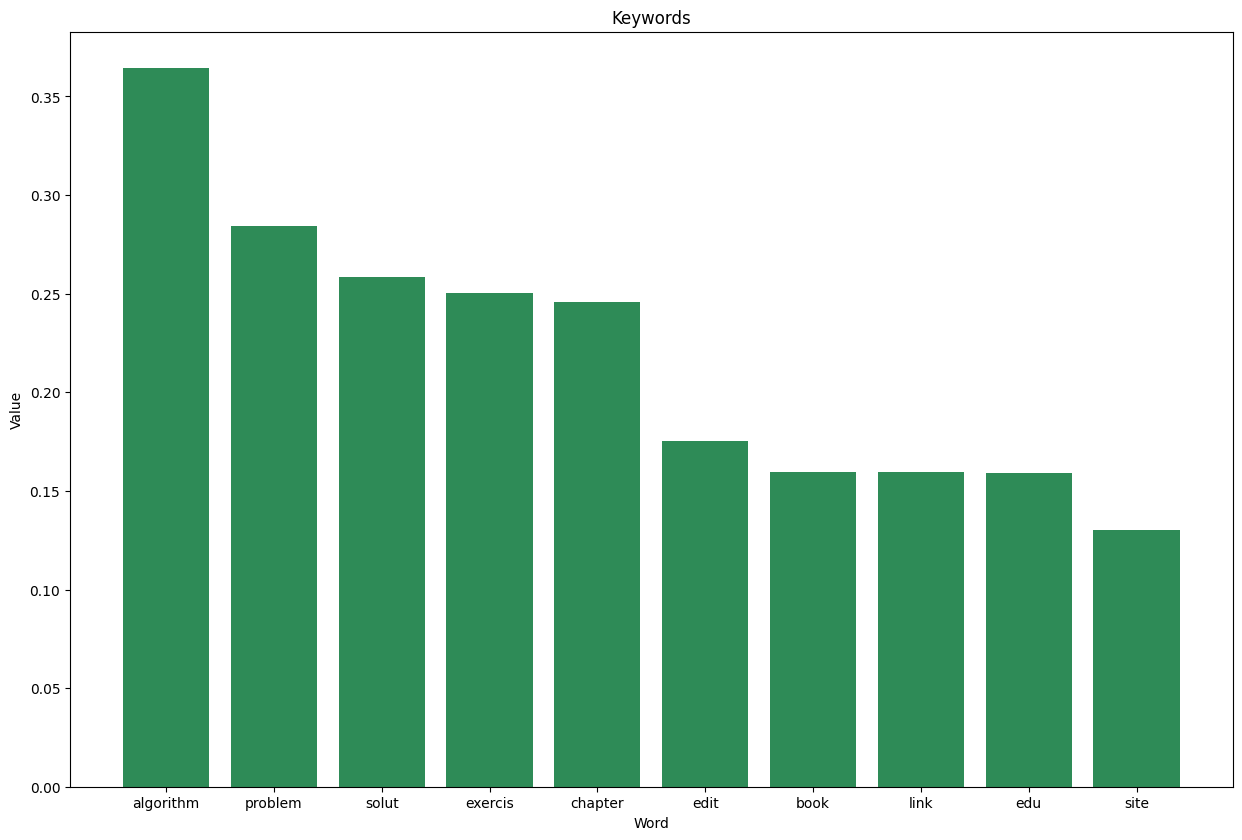

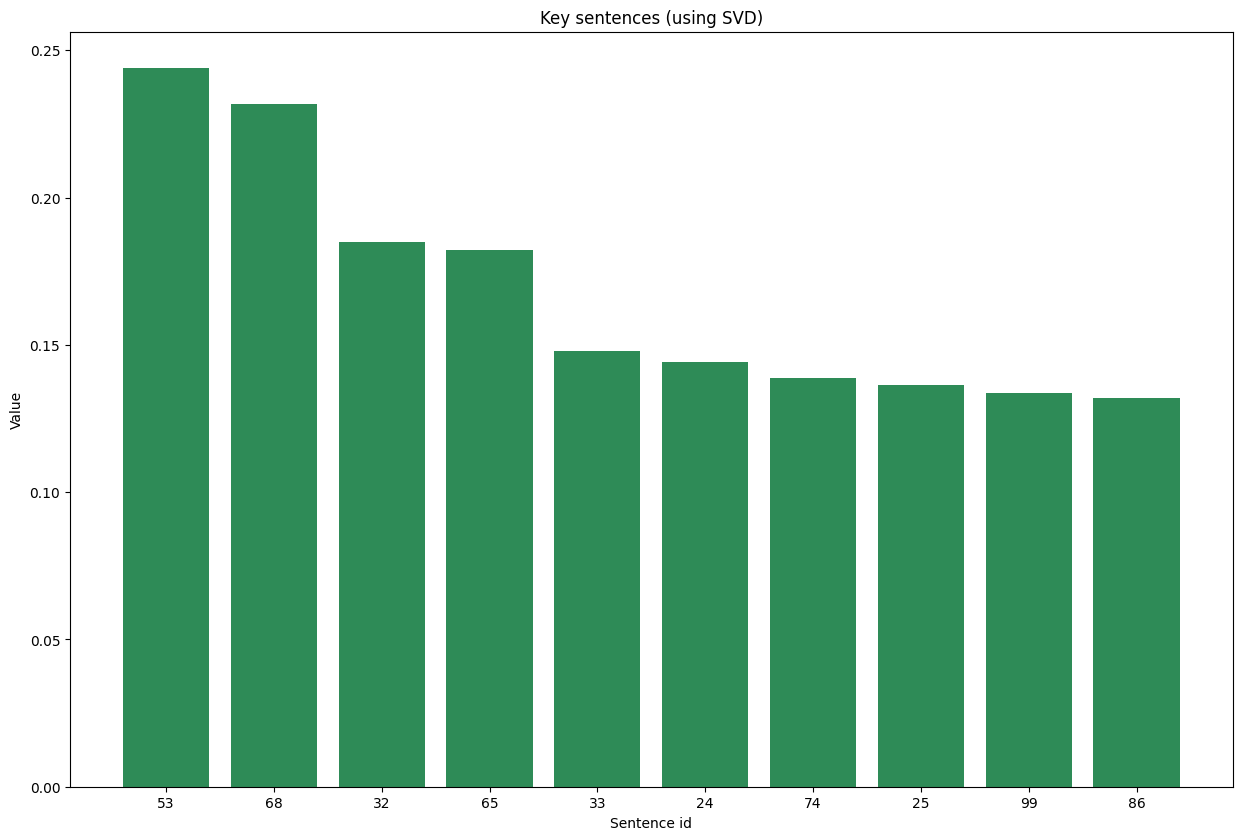

In [17]:
import matplotlib.pyplot as plt
k = 10
U, S, Vt = np.linalg.svd(vectorized_dataset.T)
u = U[:,0]
v = Vt[0,:]
u, v = list(enumerate(list(u))), list(enumerate(list(v)))
u = list(map(lambda x:(x[0],x[1]), u))
v = list(map(lambda x:(x[0],x[1]), v))
u.sort(key=lambda x: x[1], reverse=True)
v.sort(key=lambda x: x[1], reverse=True)
key_sents = dict(v[:k])

index2word = {value: key for key, value in tf_idf_vectorizer.vocabulary_.items()}
key_words = dict(map(lambda x: (index2word[x[0]], x[1]), u[:k]))

plt.figure(figsize=(15,10), dpi=100)
plt.bar(key_words.keys(), key_words.values(), color="seagreen")
plt.title("Keywords")
plt.xlabel('Word')
plt.ylabel('Value')
plt.show()

plt.figure(figsize=(15,10), dpi=100)
plt.bar(list(map(str, key_sents.keys())), key_sents.values(), color="seagreen")
plt.title("Key sentences (using SVD)")
plt.xlabel('Sentence id')
plt.ylabel('Value')
plt.show()

## First three sentences

In [18]:
ids = list(key_sents.keys())
print(dataset[ids[0]])
print(20*'=')
print(dataset[ids[1]])
print(20*'=')
print(dataset[ids[2]])

edu/algorithms/, links to solutions for
a few of the problems and exercises
edu/algorithms/, links
to solutions for some of the problems and exercises so that you can check your
work
edu/algorithms/, links to these solutions


## Finding key sentences using NMF (Approximation of matrix k-th rank)

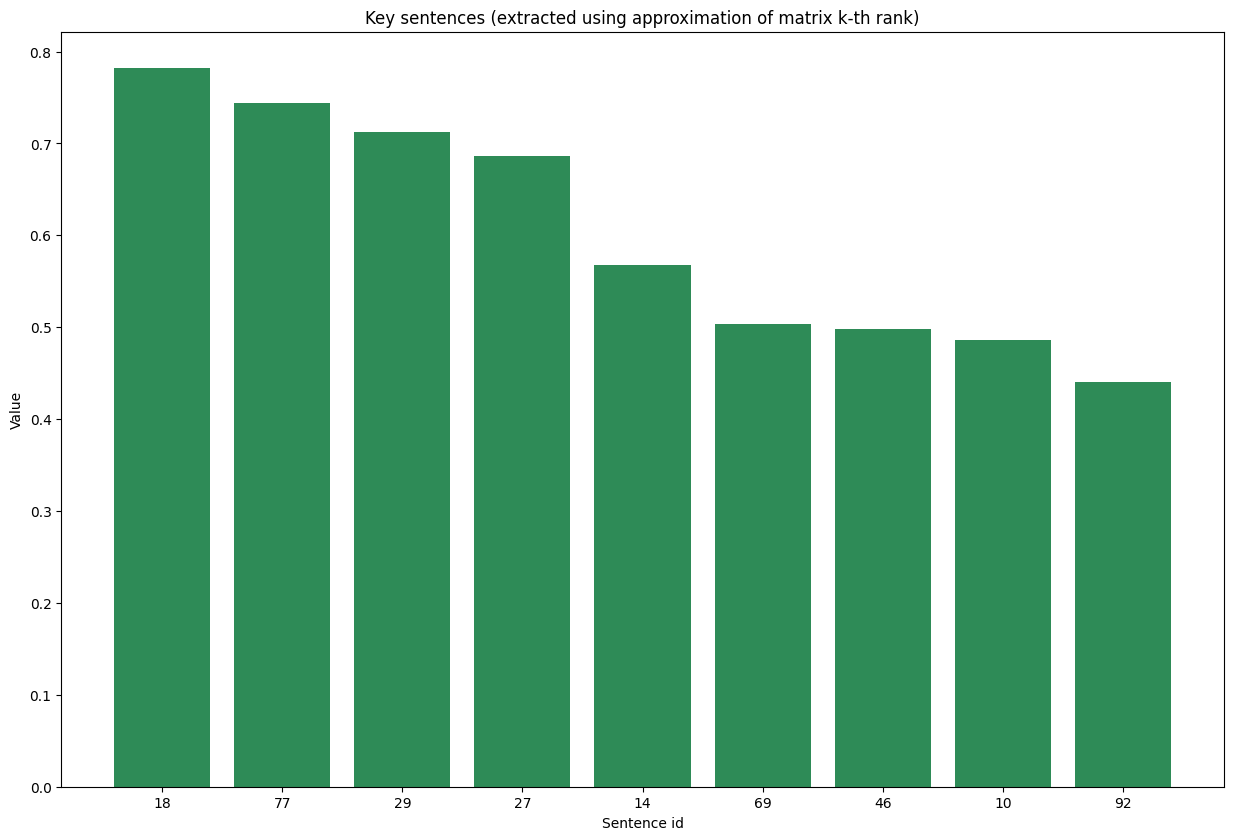

In [21]:
from sklearn.decomposition import NMF

def sgn(element):
    if element >= 0:
        return 1
    return -1

def find_key_sentences(number_of_sents, k): # k = 10
    decomposer = NMF(n_components=k, init='nndsvd', random_state=0)
    C = decomposer.fit_transform(vectorized_dataset.T)
    D = decomposer.components_
    key_sents = {}
    D1 = None
    for i in range(1, number_of_sents + 1):
        argmax_col = np.argmax(np.linalg.norm(D, axis=0))
        key_sents[argmax_col] = np.linalg.norm(D[:,argmax_col])
        D[:, [0,argmax_col]] = D[:,[argmax_col, 0]] # Swaping first column with argmax_col column. 
        V = D[:,0] + sgn(D[:,0][0])*np.linalg.norm(D[:,0])*np.identity(k-i+1)[:,0]
        V = V.reshape((k-i+1,1))
        Q = np.identity(k-i+1) - (2/(pow(np.linalg.norm(V),2)))*(V @ V.T) # Householder matrix, Q
        I = np.identity(k-i+1)
        I[0,0] = sgn(D[:,0][0])*np.linalg.norm(D[:,0])
        T = I
        D1 = np.linalg.inv(T) @ Q @ D
        D = D1[1:,1:]
    return key_sents

key_sentences_nmf = find_key_sentences(10,10) # First argument: number of sentrences wanted to be extracted; second argument: the most number of sentecnes wanted to be extarcted.
key_sentences_nmf = dict(sorted(list(zip(key_sentences_nmf.keys(),key_sentences_nmf.values())), key= lambda x: x[1], reverse=True))

plt.figure(figsize=(15,10), dpi=100)
plt.bar(list(map(str, key_sentences_nmf.keys())), key_sentences_nmf.values(), color="seagreen")
plt.title("Key sentences (extracted using approximation of matrix k-th rank)")
plt.xlabel("Sentence id")
plt.ylabel("Value")
plt.show()

## First three sentences

In [22]:
ids = list(key_sentences_nmf.keys())
print(dataset[ids[0]])
print(20*'=')
print(dataset[ids[1]])
print(20*'=')
print(dataset[ids[2]])


This is a large book, and your class will probably cover only a portion of its
material

A quick look at the table of contents shows that most of the second-edition chapters
and sections appear in the third edition

Departing from our practice in previous editions of this book, we have made
publicly available solutions to some, but by no means all, of the problems and exercises
